In [1]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.pyplot as plt


In [14]:
x_min = -10
x_max = 10
nx = 1024

def potential(x, y, ell=0.1):
    return 0.5*(x**2 + y**2) + ell*(x**3 - x**2*y)

def initial_condition(x, y):
    return np.exp(-0.5*(x**2 + y**2))

In [15]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_mass(1.0)
sim.set_potential(potential)
sim.set_initial_condition(initial_condition)
sim.set_grid([x_min, x_min], [x_max, x_max], [nx, nx])

ic| message: 'Dimension set to 2'
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function initial_condition at 0x13b5457e0>
ic| message: 'Grid set.'
ic| self.a: array([-10., -10.])
    self.b: array([10., 10.])
    self.n: array([1024, 1024])


In [16]:
sim.set_time_parameters(0.0, 150.0, 15000)

ic| 'Time parameters set.'
ic| self.t0: 0.0, self.t1: 150.0, self.n_steps: 15000


In [17]:
sim.prepare()

ic| 'Using given initial condition function. '


In [18]:
V = sim.ham.V
psi0 = sim.wf.psi.copy()


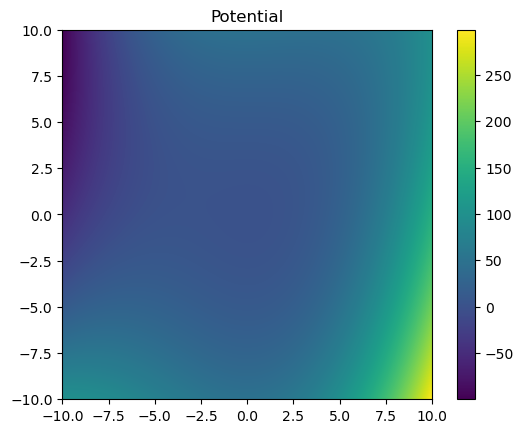

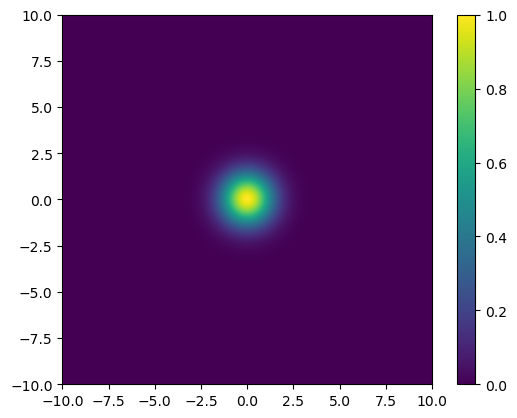

In [20]:
plt.figure()
plt.imshow(V.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()
plt.title('Potential')
plt.show()

plt.figure()
plt.imshow(psi0.real.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()
plt.show()

In [21]:
sim.prepare()

anim1 = Animator2d(sim, name = 'henon_heiles')
anim1.vis_type = 'complex'
anim1.show_axis = False
anim1.xlim = [-40, 40]
anim1.ylim = [-40, 40]
anim1.mag_map = lambda r: r**.25
anim1.set_interval(10)
anim1.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()


anim_callback1 = anim1.get_callback()
anim1.caption_format = 't = {sim.t:.02f}, P_ionized = {sim.P_ionized}'
P_hist = np.zeros_like(sim.t_grid)
def callback(sim):
    psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
    P_hist[sim.t_index] = np.sum(np.abs(psi_out)**2) * sim.grid.dtau
    sim.P_ionized = P_hist[sim.t_index]
    anim_callback1(sim)
    
    
sim.simulate(callback=callback)
anim1.make_movie("h2_molecule_1d.mp4")
anim1.clean_frames()


ic| 'Using given initial condition function. '


ic| self.name: 'henon_heiles'
ic| self.folder: './henon_heiles_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './henon_heiles_frames/frame%06d.png'
ic| self.fig_width_pixels: 1024
    self.fig_height_pixels: 1024
    self.fig_width: 10
    self.fig_height: 10.0
    self.dpi: 102.4
ic| animator.py:670 in get_extent() at 20:44:17.977
ic| x_range.shape: (1024,), y_range.shape: (1024,)
ic| extent: [-10.0, 9.98046875, -10.0, 9.98046875]
ic| self.caption_font: None
ic| 'Running simulation...'


  0%|          | 0/15000 [00:00<?, ?it/s]

KeyboardInterrupt: 

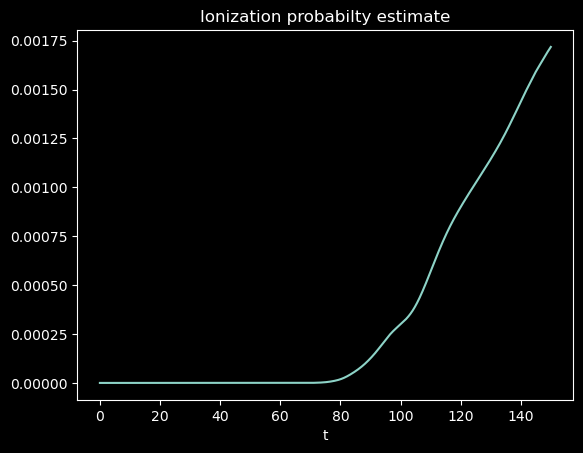

In [37]:
plt.figure()
plt.plot(sim.t_grid[:-1], P_hist[:-1])
plt.title('Ionization probabilty estimate')
plt.xlabel('t')
plt.show()

In [ ]:
sim.ham.D

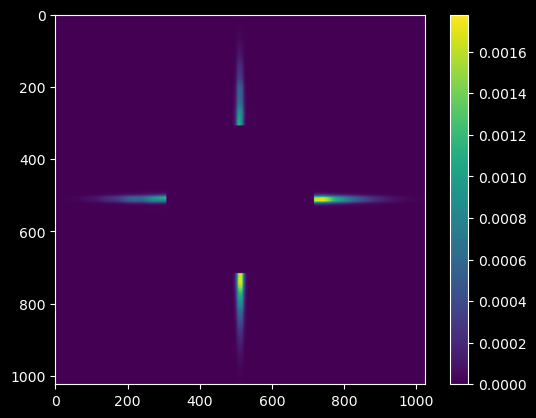

In [27]:
psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
plt.figure()

plt.imshow(np.abs(psi_out))
plt.colorbar()

In [11]:
help(np.where)

Help on _ArrayFunctionDispatcher in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called